In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
a = 2.0
b = 0.01
c = 1.0
d = 0.02
x0 = 40
y0 = 9

In [5]:
dt = 0.1
T = 200
t = np.linspace(0, T, int(T/dt) + 1)

In [6]:
def lotka_volterra(x, y):
    dxdt = a*x - b*x*y
    dydt = -c*y + d*x*y
    return dxdt, dydt

In [7]:
x = np.zeros(len(t))
y = np.zeros(len(t))

x[0] = x0
y[0] = y0

In [8]:
for i in range(1, len(t)):
    k1x, k1y = lotka_volterra(x[i-1], y[i-1])
    k2x, k2y = lotka_volterra(x[i-1] + k1x * dt / 2, y[i-1] + k1y * dt / 2)
    k3x, k3y = lotka_volterra(x[i-1] + k2x * dt / 2, y[i-1] + k2y * dt / 2)
    k4x, k4y = lotka_volterra(x[i-1] + k3x * dt, y[i-1] + k3y * dt)
    
    x[i] = x[i-1] + (dt / 6) * (k1x + 2*k2x + 2*k3x + k4x)
    y[i] = y[i-1] + (dt / 6) * (k1y + 2*k2y + 2*k3y + k4y)

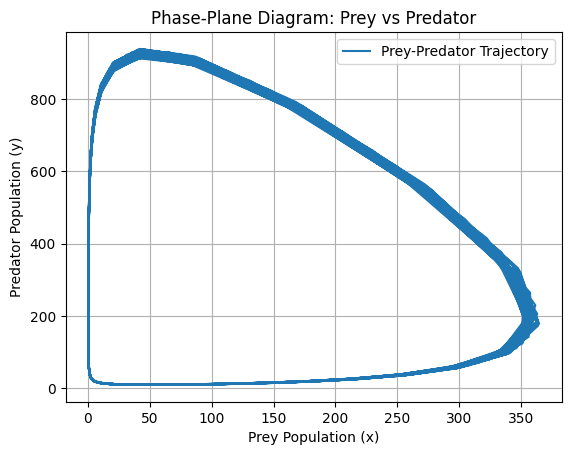

In [9]:
plt.plot(x, y, label="Prey-Predator Trajectory")
plt.xlabel('Prey Population (x)')
plt.ylabel('Predator Population (y)')
plt.title('Phase-Plane Diagram: Prey vs Predator')
plt.grid()
plt.legend()
plt.show()